<a href="https://colab.research.google.com/github/felipe-gm/ifusp_fiscomp_1/blob/master/2020_03_11_Primeiro_EP/Questao1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from math  import floor
from numpy import arange

import matplotlib.pyplot as plt

# Programa

In [0]:
def f(x,t):
  """Equacao de diferenca:
    f(x,t) := dV_out/dt = (V_in-V_out)/RC.

  Positional arguments:
  x -- tensao de saida (type float)
  t -- tempo (type float)
  """
  return (V_in(t)-x)/RC

In [0]:
def rk4_integration(RC):
  """Integra 
    f(x,t) := dV_out/dt = (V_in-V_out)/RC
  usando o metodo de Runge-Kutta de quarta ordem parametrizando em RC.

  Positional arguments:
  RC -- time constant of an RC circuit (type float)
  """
  x_rk4 = []

  x = xa
  for t in t_rk4:
    x_rk4.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+.5*k1,t+.5*h)
    k3 = h*f(x+.5*k2,t+.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6
  
  return x_rk4

In [0]:
def V_in(t):
  """Sinal de entrada dado por uma onda quadrada, centrada em 0 com altura 1:
    V_in(t) = 
      1, se floor(2t) eh par,
      -1, se floor(2t) eh impar.

  Positional arguments:
  t -- tempo (type float)
  """
  if floor(2*t)%2==0: return 1
  return -1

Parametrizacao do programa

In [0]:
a = 0.0           # Início do intervalo
b = 10.0          # Final do intervalo

ls_RC = [0.01, 0.1, 1]

xa = 0.0          # Condição inicial, ou seja, x(a)

Decisao de h

In [0]:
h = 1e-5 # REQ: good precision runtime-duration rate <FGM 2020-03-24 s:done>

Integrar

In [0]:
t_rk4 = arange(a,b,h)

dict_x_rk4 = {}
for RC in ls_RC:
  dict_x_rk4[RC] = rk4_integration(RC)

Graficar

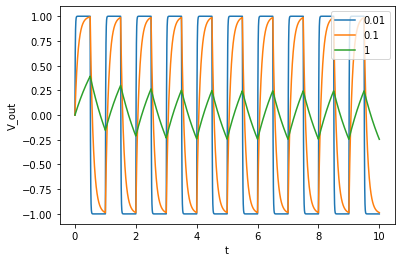

In [0]:
for RC in ls_RC:
  plt.plot(t_rk4, dict_x_rk4[RC], label=RC)
plt.xlabel("t")
plt.ylabel("V_out")
plt.legend(loc='upper right')
plt.show()

# Descricao

O grafico exposto aponta que o aumento em $RC$ suaviza mais as
descontinuidades do sinal de entrada $V_{in}$. $RC$ é o tempo necessario
para carrgar $e^{-1}$ de uma diferenca de potencial.

Sabemos que os auto-vetores da equção diferencial do "passa-baixas"
formam a base de Fourrier. Na representacao do sinal pela base de
Fourrier que o nome do filtro ganha semantica, pois os auto-valores
associados decrescem com a frequencia. Assim, as frequencias mais altas
ficam mais atenuadas repercutindo nessa atenuação das variacoes do sinal filtrado.